In [1]:
# import required libraries
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load train/test data
train_path = Path("../data/processed/train.csv")
test_path = Path("../data/processed/test.csv")

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (480, 5)
Test shape: (120, 5)


,attendance_percent,test_score,discipline_count,parental_involvement,dropout_risk
0,0.195251,2.351161,0.099109,1.342883,0
1,-0.863290,-1.411878,-0.533500,0.623481,1
2,1.763691,0.214176,-0.533500,1.342883,0
3,0.132684,-0.049152,0.731717,1.342883,1
4,0.179204,0.130772,-0.533500,-1.534724,0


In [3]:
# Split features and target
target_col = "dropout_risk"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))


X_train shape: (480, 4)
y_train distribution:
 dropout_risk
1    0.647917
0    0.352083
Name: proportion, dtype: float64


In [ ]:
# Initialize and train Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)



y_pred = model.predict(X_test)


In [5]:
# Evaluate model performance
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.92      0.87      0.89        78

    accuracy                           0.87       120
   macro avg       0.85      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120


Confusion Matrix:
 [[36  6]
 [10 68]]


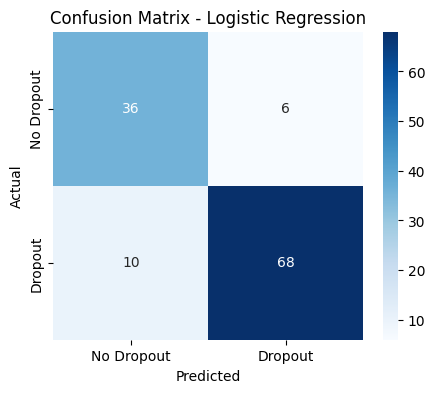

In [6]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Dropout", "Dropout"], yticklabels=["No Dropout", "Dropout"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [7]:
# Save trained model
import joblib
model_path = Path("../models/logistic_regression.pkl")
model_path.parent.mkdir(parents=True, exist_ok=True)
joblib.dump(model, model_path)

print(f"✅ Model saved to {model_path}")


✅ Model saved to ..\models\logistic_regression.pkl


In [9]:
loaded_model = joblib.load(model_path)
sample_pred = loaded_model.predict([X_test.iloc[0]])
print("Sample prediction:", sample_pred)

Sample prediction: [1]


c:\Users\Admin\Desktop\EduLensModelTraining\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
